In [1]:
import collections
from functools import partial
import re
import subprocess

import matplotlib.pyplot as pld
import numpy as np
import pandas as pd
import tqdm

In [16]:
df = pd.read_csv("build/stats.txt", header=None, names=["lower", "upper", "iter", "step", "ref"])

In [18]:
df["count"] = df.upper - df.lower

In [19]:
df_counts = df[["iter", "count", "step"]]

In [30]:
def quant(q):
    return partial(np.quantile, q=q)

In [73]:
step_size_q50 = df_counts.groupby("iter").agg(quant(0.5))["step"]
step_size_q90 = df_counts.groupby("iter").agg(quant(0.9))["step"]
step_size_q95 = df_counts.groupby("iter").agg(quant(0.95))["step"]
step_size_q99 = df_counts.groupby("iter").agg(quant(0.99))["step"]
step_size_max = df_counts.groupby("iter").agg("max")["step"]

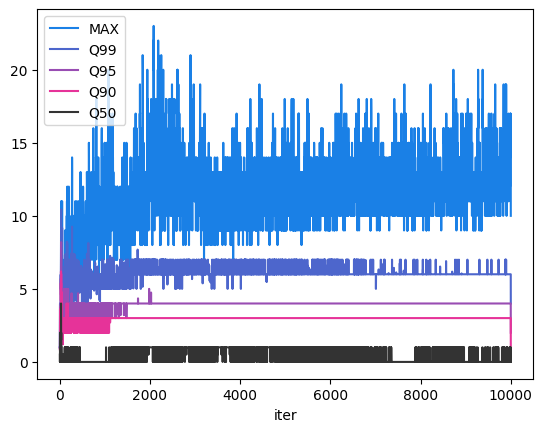

In [75]:
step_size_max.plot(label="MAX", color=(0.1, 0.5, 0.9, 1.0))
step_size_q99.plot(label="Q99", color=(0.3, 0.4, 0.8, 1.0))
step_size_q95.plot(label="Q95", color=(0.6, 0.3, 0.7, 1.0))
step_size_q90.plot(label="Q90", color=(0.9, 0.2, 0.6, 1.0))
step_size_q50.plot(label="Q50", color=(0.2, 0.2, 0.2, 1.0))

plt.legend(loc="best");

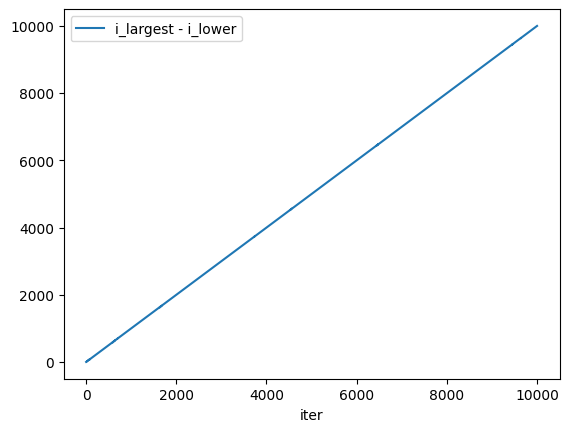

In [78]:
df_counts.groupby("iter").agg("max")["count"].plot(label="i_largest - i_lower")
plt.legend(loc="best");

In [ ]:
info = collections.defaultdict(list)
total_num_edges = []

In [23]:
for size in tqdm.tqdm(["xs", "s", "m", "l", "xl"]):
    process = subprocess.run(['build/CountTri', f'data/example_{size}.txt'],
                             check=True, stdout=subprocess.PIPE, universal_newlines=True)
    output = process.stdout

    total_reg = re.compile("Total num edges: (.*)\n")
    total_num_edges.append(int(next(total_reg.finditer(output)).groups()[0]))

    
    reg = re.compile("Running CountTri_(.*)\nNum triangles: (.*)\nTime: (.*) m\. (.*) s\. (.*) ms\. (.*) us\.")
    for match in reg.finditer(output):
        name, num_tri, m, s, ms, us = match.groups()
        ms_total = int(m)*60*1000 + int(s)*1000 + int(ms) + int(us)/1000
        info[name].append(ms_total)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:51<00:00, 70.27s/it]


In [27]:
for size in tqdm.tqdm(["xxl"]):
    process = subprocess.run(['build/CountTri', f'data/example_{size}.txt'],
                             check=True, stdout=subprocess.PIPE, universal_newlines=True)
    output = process.stdout

    total_reg = re.compile("Total num edges: (.*)\n")
    total_num_edges.append(int(next(total_reg.finditer(output)).groups()[0]))

    
    reg = re.compile("Running CountTri_(.*)\nNum triangles: (.*)\nTime: (.*) m\. (.*) s\. (.*) ms\. (.*) us\.")
    for match in reg.finditer(output):
        name, num_tri, m, s, ms, us = match.groups()
        ms_total = int(m)*60*1000 + int(s)*1000 + int(ms) + int(us)/1000
        info[name].append(ms_total)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:10:44<00:00, 4244.33s/it]


Text(0.5, 0, 'Num edges')

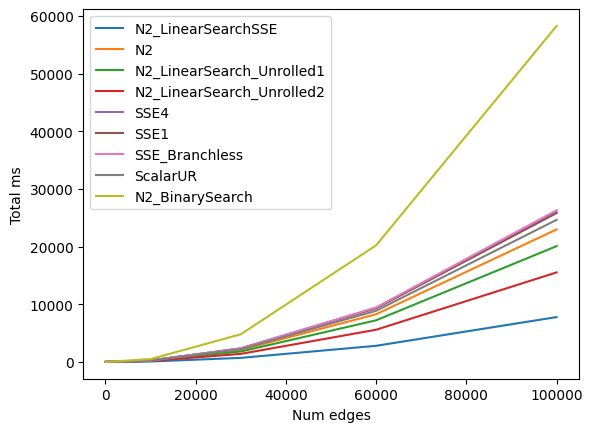

In [51]:
for name, timings in info.items():
    plt.plot(total_num_edges[:-1], timings[:len(total_num_edges)-1], label=name)
plt.legend(loc="best")
plt.ylabel("Total ms")
plt.xlabel("Num edges")